# ROI

= "Region Of Interest"

L'idée ici est de convertir un shapefile (format qui donne une liste de coordonnées géographiques) en raster (image d'une résolution donnée).

Le code utilisé ici est terriblement innefficace... mais il fait le job.

Si vous voulez faire tourner les notebooks sur un autre zone:
- créer les polygones "beach" et "sea" dans QGIS (ou autre), les exporter en geojson
- remplacer les chemins des fichier *_GEOJSON ci dessous, et surtout
- mettre à jour les limites x0, x1, y0, y1

In [1]:
# To make sure that you run an up-to-date version of your package:
# always do "Kernel > Restart and Run All"
LOG="/tmp/log_install"
!(cd ..; pip install . > $LOG 2>&1 || (echo "ERROR: INSTALL FAILED ! "; cat $LOG); cd - > /dev/null;)
from suntox import roi as sr

In [2]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, Point
from matplotlib import pyplot as plt

In [3]:
BEACH_GEOJSON="../data/agde_sete__beach.json"
SEA_GEOJSON="../data/agde_sete__sea.json"
BATHIMETRY_TIF="../data/ROI_bathimetry.tif"
BOUNDS=(3.4515, 3.6882, 43.2278, 43.4004)

In [4]:
beach = gpd.read_file(BEACH_GEOJSON)
sea = gpd.read_file(SEA_GEOJSON)

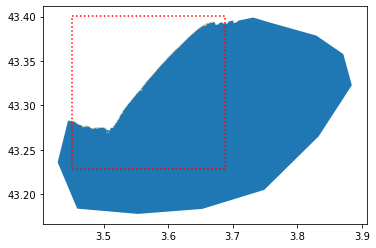

In [5]:
ax = sea.plot()
beach.plot(ax=ax, color="#dbc880")
x0 = 3.4515
x1 = 3.6882
y0 = 43.2278
y1 = 43.4004
roi_lons = [x0, x1, x1, x0, x0]
roi_lats = [y1, y1, y0, y0, y1]
ax.plot(roi_lons, roi_lats, 'r:')
bounds = (x0,x1,y0,y1)

roi_geom = Polygon(zip(roi_lons, roi_lats))
(gpd.GeoDataFrame(index=[0], crs=beach.crs, geometry=[roi_geom])
    .to_file("../data/roi.json", driver='GeoJSON'))

<AxesSubplot:>

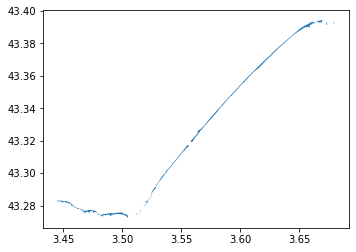

In [6]:
beach.plot()

In [7]:
raster_resol_m=100

In [8]:
sea, beach, roi = sr.load_roi(BEACH_GEOJSON, SEA_GEOJSON, BATHIMETRY_TIF, BOUNDS, raster_resol_m)

loading bathymetry...


<IPython.core.display.Javascript object>


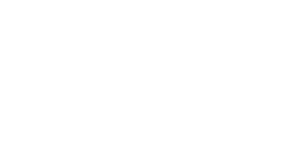

In [9]:
%matplotlib notebook
# '2*beach' = just a trick to have different colors in plot!
plt.figure(figsize=(5,5))
plt.imshow((roi["sea"] + 2*roi["beach"]).T, origin="lower")


In [10]:
%matplotlib inline

In [11]:
np.savez_compressed("../data/roi.npz", **roi)

In [12]:
rroi = dict(np.load("../data/roi.npz"))

In [13]:
rroi["lat"].max()

43.4004

In [14]:
roi["bath"].min()

-68.4000015258789